In [9]:
import sys
sys.path.append("..")
import gnn_utils

import matplotlib.pyplot as plt
from scziDesk_preprocess import *
from scziDesk_network import *
from scziDesk_utils import *
import argparse
from sklearn.metrics import adjusted_rand_score, normalized_mutual_info_score
from collections import Counter
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import glob2
from tqdm.notebook import tqdm
plt.ion()
plt.show()
%load_ext autoreload
%autoreload 2


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [2]:
from scipy.stats import skew, kurtosis

In [13]:
category = "real_data"
category = "imbalanced_data"
# category = "balanced_data"
if category == "real_data":
    path= "../../"
    files = [x for x in os.listdir(f'{path}dataset') if x.startswith(".")== False]
    print(files)
else:
    path= "../"
    files = glob2.glob(f'{path}/R/simulated_data/{category}/*.h5')
    files = [f[len(f"{path}/R/simulated_data/{category}/"):-3] for f in files]
    print(files)

['data_1c8', 'data_-1c4', 'data_-1c8', 'data_0c4', 'data_0c8', 'data_0c16', 'data_1.5c4', 'data_1c32', 'data_1c4', 'data_1.5c8', 'data_1.5c16', 'data_0c32', 'data_1.5c32', 'data_-1c32', 'data_-1c16', 'data_1c16']


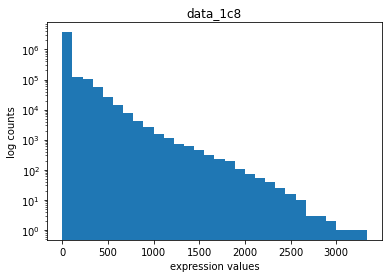

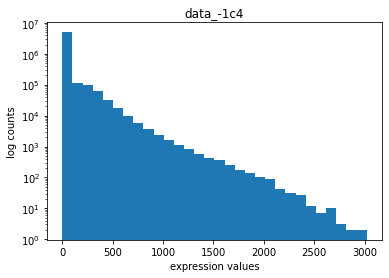

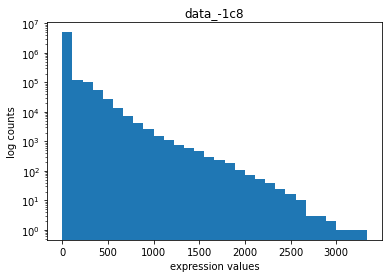

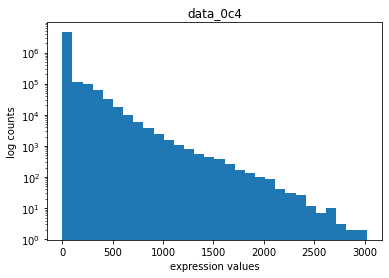

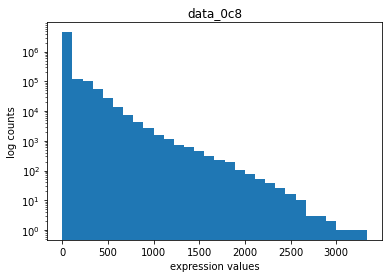

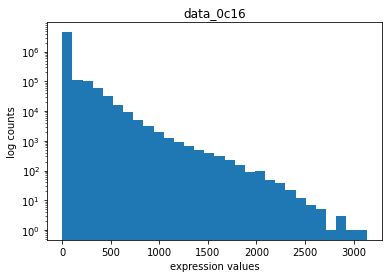

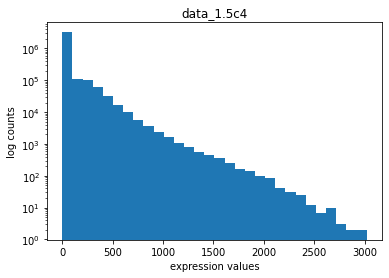

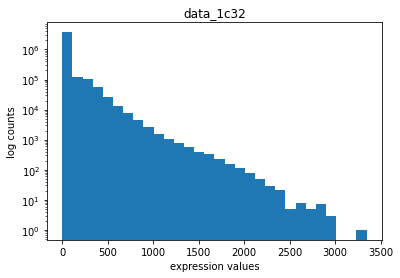

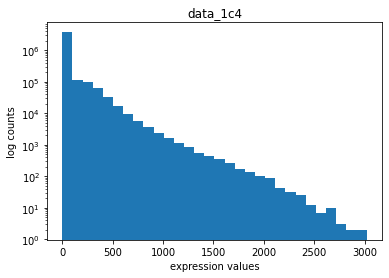

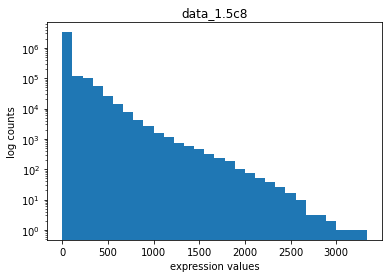

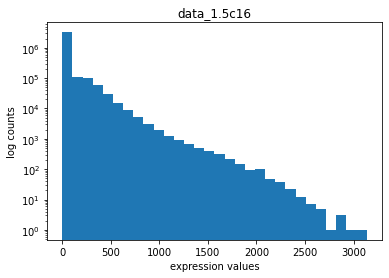

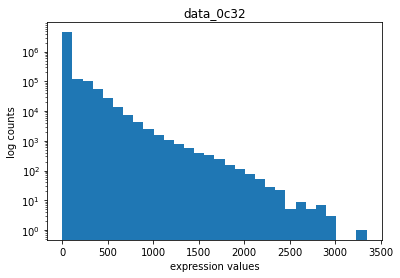

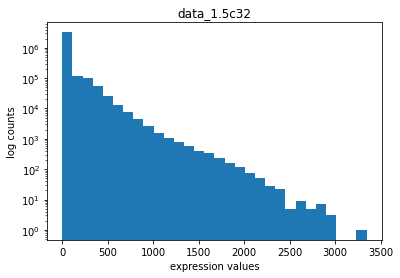

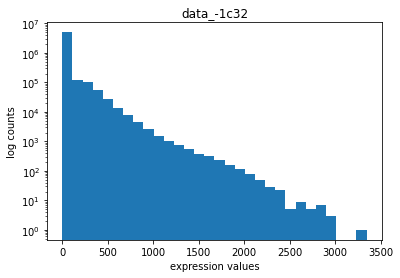

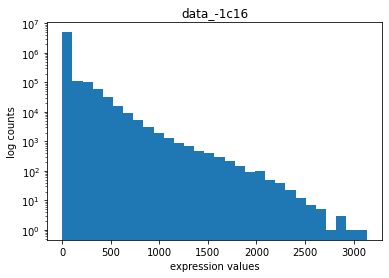

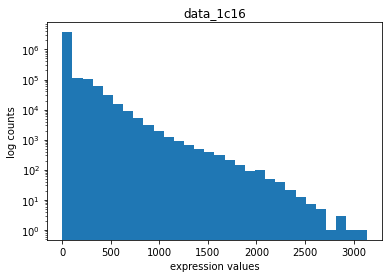

In [14]:
df = pd.DataFrame(columns=["dataset", "size", "nb_clusters",  
                          "sparsity", "max_value", "non_zero_mean","non_zero_median", "non_zero_skew", 
                           "non_zero_kurosis", "cluster_sizes",])

for dataset in tqdm(files):
    if category == "real_data":
        X, Y, gene_names = gnn_utils.get_sczi_data(path, dataset)
    else:
        data_mat = h5py.File(f"{path}/R/simulated_data/{category}/{dataset}.h5","r")

        dp = data_mat['dropout'][0]
        Y = np.array(data_mat['Y'])
        X = np.array(data_mat['X'])
    if category == "real_data" and X.shape[0] > 20000:
        continue
    n_clusters = np.unique(Y).shape[0]
    sparsity = len(np.where(X == 0)[0])/(X.shape[0] *X.shape[1])
    max_value = int(np.max(X))
    non_zero = X[np.where(X != 0)]
    non_zero_mean = np.mean(non_zero)
    non_zero_median= np.median(non_zero)
    non_zero_skew=skew(non_zero)
    non_zero_kurosis=kurtosis(non_zero)
    df.loc[df.shape[0]] = [
        dataset, f"{X.shape[0]} x {X.shape[1]}", n_clusters,
        
        sparsity, max_value, non_zero_mean, non_zero_median, non_zero_skew, non_zero_kurosis,
        list(zip(*Counter(Y).most_common()))[1]
    ]
    plt.figure()
    plt.hist(non_zero, bins = 30, log = True)
    plt.xlabel("expression values")
    plt.ylabel("log counts")
    plt.title(dataset)
    plt.show()

df.sort_values(by="nb_clusters").reset_index(
    drop=True).to_excel(f"../output/pickle_results/{category}/description.xlsx")

In [12]:
df

,dataset,size,nb_clusters,sparsity,max_value,non_zero_mean,non_zero_median,non_zero_skew,non_zero_kurosis,cluster_sizes
0,data_1c8,2000 x 2500,8,0.468794,2282,43.145222,12.0,4.500942,27.181120,"(278, 272, 257, 252, 241, 235, 233, 232)"
1,data_-1c4,1000 x 2500,4,0.278958,2675,33.682916,10.0,6.014687,49.203858,"(271, 263, 253, 213)"
2,data_-1c8,2000 x 2500,8,0.297187,2282,34.350527,9.0,5.181613,36.052755,"(278, 272, 257, 252, 241, 235, 233, 232)"
3,data_0c4,1000 x 2500,4,0.342292,2675,36.309757,12.0,5.753918,44.997539,"(271, 263, 253, 213)"
4,data_0c8,2000 x 2500,8,0.363474,2282,37.307854,10.0,4.930736,32.638878,"(278, 272, 257, 252, 241, 235, 233, 232)"
5,data_0c16,4000 x 2500,16,0.344274,2516,36.248329,11.0,5.818460,46.412474,"(266, 265, 263, 263, 256, 256, 254, 253, 252, ..."
6,data_1.5c4,1000 x 2500,4,0.507741,2675,45.299245,15.0,5.009927,34.036199,"(271, 263, 253, 213)"
7,data_1c32,8000 x 2500,32,0.466219,2280,42.851812,12.0,4.577014,25.718034,"(290, 281, 279, 277, 274, 264, 264, 263, 259, ..."
8,data_1c4,1000 x 2500,4,0.443902,2675,41.361255,14.0,5.309307,38.258043,"(271, 263, 253, 213)"
9,data_1.5c8,2000 x 2500,8,0.533892,2282,47.772308,13.0,4.214203,23.831165,"(278, 272, 257, 252, 241, 235, 233, 232)"
